In [1]:
import pandas as pd
import numpy as np
import seaborn as sb

In [2]:
df = pd.read_csv('../data_sets/Wine.csv')
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [3]:
x = df.iloc[:,0:13].values
y = df.iloc[:,13].values

print("Target : \n", y)

Target : 
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [5]:
import sklearn.model_selection 

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.30, random_state=100)

In [7]:
# Preprocess data (transform data into standard scale).
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

x_test

array([[-1.65000810e+00, -1.80319479e-01,  3.28550108e-01,
         6.12420801e-01, -1.17423888e+00, -6.71028741e-01,
        -4.92015983e-01,  9.54043833e-01, -5.29232832e-01,
        -1.02545268e+00,  9.47211046e-02,  6.80410695e-02,
        -2.68850536e-01],
       [ 5.58780025e-01, -5.29828497e-01,  9.91591555e-01,
         8.77636794e-01, -7.90055181e-01,  3.82641949e-01,
        -1.08846817e+00,  1.26888465e+00,  1.17766753e+00,
         3.19892515e+00, -1.90628099e+00, -1.36022766e+00,
        -4.52747566e-01],
       [ 1.32705416e+00, -7.00102121e-01, -1.87148796e-01,
        -8.02064495e-01, -3.29034746e-01, -2.65770783e-01,
         2.56076587e-01, -7.77580635e-01, -1.29745515e-01,
         1.29418676e-02,  8.85814957e-01,  1.71112009e-01,
         1.57011976e+00],
       [-1.26587103e+00, -1.04961114e+00, -2.60820068e-01,
         4.35610139e-01,  1.31985689e-01,  1.64704678e+00,
        -3.70948256e-02, -1.80081328e+00,  1.55226011e-02,
        -8.31933699e-01,  4.81861721e

In [8]:
# Apply PCA on training and testing parts of X
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [9]:
explained_variance = pca.explained_variance_ratio_
print("Explained variance : ", explained_variance)

Explained variance :  [0.35160911 0.20766228]


In [11]:
# Perform linear regerssion on the data

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(random_state=100)
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

print("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.9814814814814815


In [23]:
# Visualize test set through scatter plot.

x_set, y_set = x_test, y_pred

x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1,
stop = x_set[:, 0].max() + 1, step = 0.01),
np.arange(start = x_set[:, 1].min() - 1,
stop = x_set[:, 1].max() + 1, step = 0.01))

print(type(x1))
print(type(x2))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


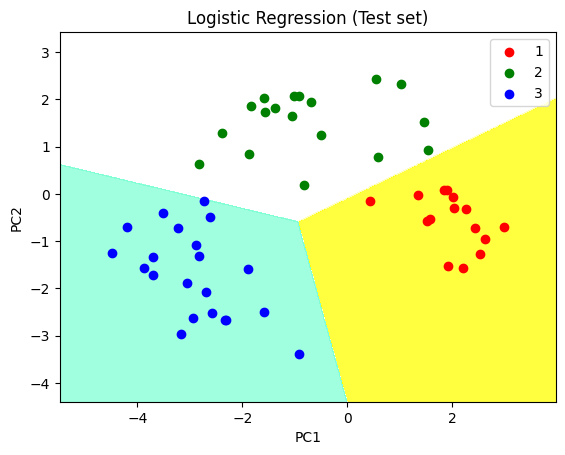

In [26]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

plt.contourf(x1, x2, lr.predict(np.array([x1.ravel(),
x2.ravel()]).T).reshape(x1.shape), alpha = 0.75,
cmap = ListedColormap(('yellow', 'white', 'aquamarine')))


for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
    c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
    # title for scatter plot
    plt.title('Logistic Regression (Test set)')
    plt.xlabel('PC1') # for Xlabel
    plt.ylabel('PC2') # for Ylabel
    plt.legend()

# show the scatter plot
plt.show()


In [28]:
# Custom PCA function.
def _PCA(x, num_components):
    x_mean = x - np.mean(x, axis=0)
    covariance = np.cov(x_mean, rowvar=False)
    eigen_values, eigen_vectors = np.linalg.eigh(covariance)
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]
    x_reduced = np.dot(eigenvector_subset.transpose() , x_mean.transpose() ).transpose()

    return x_reduced

In [30]:
iris = sb.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [34]:
x = iris.iloc[:,0:4]
y = iris.iloc[:,4]

pca_result =_PCA(x, 2)

df  = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
df = pd.concat([df, pd.DataFrame(y)], axis=1)

df

,PC1,PC2,species
0,2.684126,0.319397,setosa
1,2.714142,-0.177001,setosa
2,2.888991,-0.144949,setosa
3,2.745343,-0.318299,setosa
4,2.728717,0.326755,setosa
...,...,...,...
145,-1.944110,0.187532,virginica
146,-1.527167,-0.375317,virginica
147,-1.764346,0.078859,virginica
148,-1.900942,0.116628,virginica


<AxesSubplot: xlabel='PC1', ylabel='PC2'>

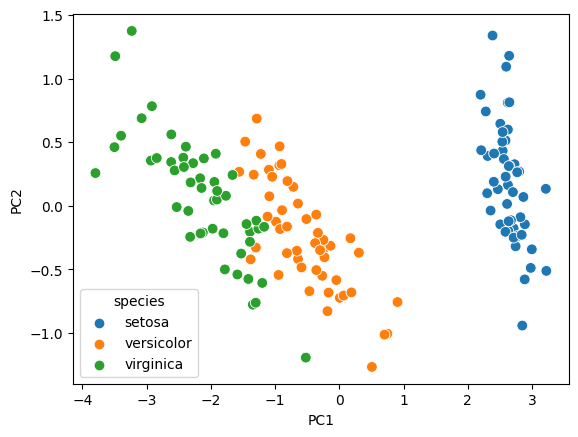

In [39]:
sb.scatterplot(data=df, x='PC1', y='PC2', s=60, hue='species')

Singular Value Decomposition (SVD)

In [41]:
from numpy.linalg import svd

a = np.array([[4, 0], [3, -5]])

u, s, vt = svd(a)

print('U : \n', u, '\nS : \n', s)

U : 
 [[-0.4472136  -0.89442719]
 [-0.89442719  0.4472136 ]] 
S : 
 [6.32455532 3.16227766]


Clustering

In [44]:
from sklearn.cluster import KMeans

df = pd.read_csv('../data_sets/CountryClusters.csv')
df

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


In [45]:
x = df.iloc[:,1:3]

k_means = KMeans(3)
k_means.fit(x)

identified_clusters = k_means.fit_predict(x)
identified_clusters

array([2, 2, 0, 0, 0, 1])

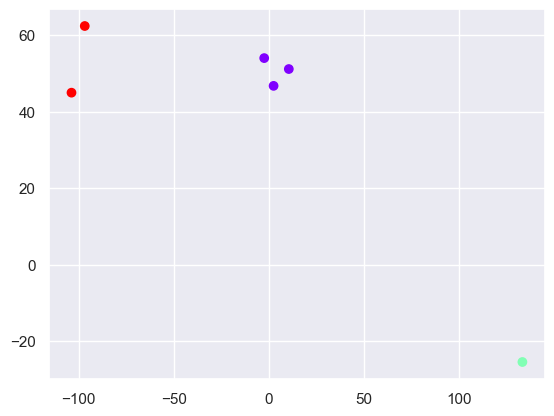

In [47]:
df['Clusters'] = identified_clusters
plt.scatter(df['Longitude'],df['Latitude'], c=df['Clusters'],cmap='rainbow')

In [48]:
df = pd.read_csv('../data_sets/Country_data.csv')
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [49]:
y = df.iloc[:,1:10]

k_means = KMeans(10)
k_means.fit(y)

identified_clusters = k_means.fit_predict(y)
identified_clusters

array([5, 0, 0, 5, 7, 7, 5, 1, 1, 0, 3, 9, 5, 7, 0, 1, 0, 5, 5, 5, 0, 0,
       7, 4, 0, 5, 5, 5, 5, 1, 5, 5, 5, 7, 0, 0, 5, 5, 5, 0, 5, 7, 3, 3,
       1, 0, 0, 0, 0, 9, 5, 7, 0, 1, 1, 7, 5, 5, 1, 5, 3, 0, 5, 5, 5, 5,
       5, 7, 1, 5, 0, 7, 0, 1, 3, 3, 0, 1, 0, 7, 5, 5, 4, 5, 5, 7, 7, 5,
       5, 7, 7, 2, 0, 5, 5, 7, 0, 5, 3, 5, 7, 5, 5, 0, 0, 5, 5, 5, 0, 5,
       1, 3, 5, 5, 8, 9, 5, 7, 0, 0, 5, 7, 3, 6, 7, 7, 5, 5, 9, 5, 0, 7,
       5, 4, 7, 3, 5, 0, 3, 3, 0, 0, 5, 0, 1, 8, 5, 5, 0, 5, 5, 5, 0, 7,
       0, 5, 0, 4, 1, 1, 7, 5, 5, 7, 5, 5, 5])

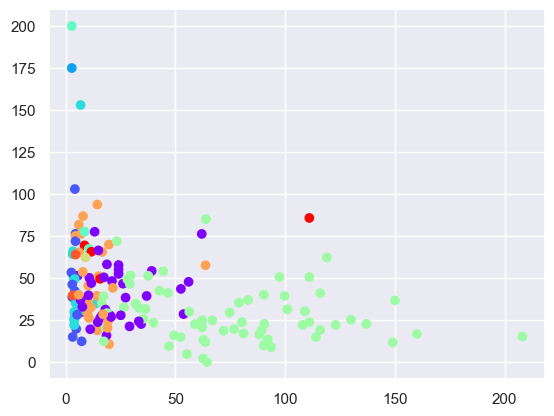

In [50]:
df['Clusters'] = identified_clusters
plt.scatter(df['child_mort'],df['exports'], c=df['Clusters'],cmap='rainbow')

In [51]:
# Agglomerative Clustering

from sklearn.cluster import AgglomerativeClustering
x = [4, 5, 10, 4, 3, 11, 14, 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

data = list(zip(x, y))

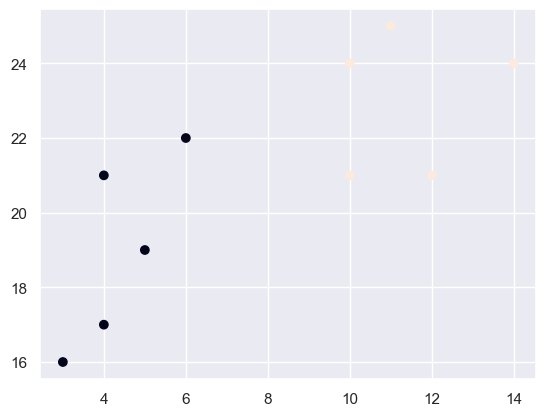

In [52]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(data)

plt.scatter(x, y, c=labels)
plt.show()

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [10.0, 10.0, 32.5, 32.5],
  [55.0, 55.0, 65.0, 65.0],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [60.0, 60.0, 82.5, 82.5],
  [21.25, 21.25, 71.25, 71.25]],
 'dcoord': [[0.0, 2.0, 2.0, 0.0],
  [0.0, 1.4142135623730951, 1.4142135623730951, 0.0],
  [0.0, 4.08248290463863, 4.08248290463863, 1.4142135623730951],
  [2.0, 5.266244708835067, 5.266244708835067, 4.08248290463863],
  [0.0, 1.4142135623730951, 1.4142135623730951, 0.0],
  [0.0, 2.23606797749979, 2.23606797749979, 0.0],
  [0.0, 2.886751345948129, 2.886751345948129, 2.23606797749979],
  [1.4142135623730951,
   6.860515043833565,
   6.860515043833565,
   2.886751345948129],
  [5.266244708835067,
   18.02775637731995,
   18.02775637731995,
   6.860515043833565]],
 'ivl': ['8', '9', '6', '2', '5', '3', '4', '7', '0', '1'],
 'leaves': [8, 9, 6, 2, 5, 3, 4, 7, 0, 1],
 'color_list': ['C1', 'C1', 'C1', 'C1', 'C2', 'C2', 'C2', 'C2', '

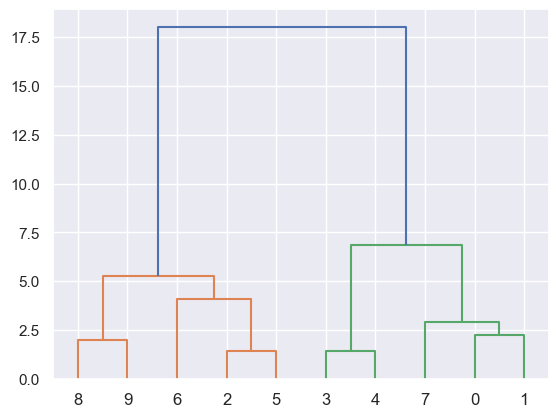

In [53]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
linkage_data = linkage(data, method='ward', metric='euclidean')
dendrogram(linkage_data)

[0 0 1 0 0 1 1 0 1 1]


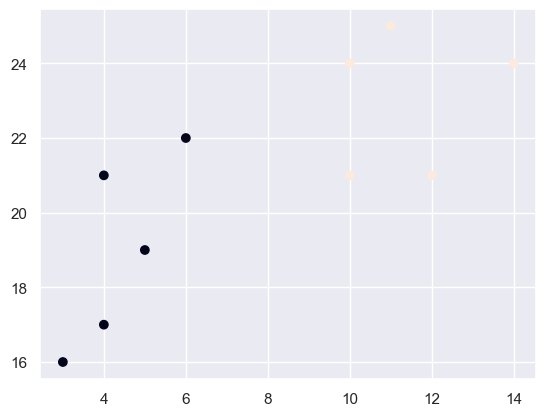

In [54]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(data)
print(labels)
plt.scatter(x, y, c=labels)
plt.show()